In [59]:
import pandas as pd
import numpy as np
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [60]:
df = pd.read_csv("Final FBRef 2022-2023.csv")

In [61]:
df.set_index('Player', inplace = True)
tf = df

In [62]:
df.columns

Index(['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP', 'Starts', 'Min',
       'G+A',
       ...
       'pAdjAerialWinsPer90', 'pAdjAerialLossPer90', 'pAdjDrbPastAttPer90',
       'TouchCentrality', 'Tkl+IntPer600OppTouch', 'pAdjTouchesPer90',
       'CarriesPer50Touches', 'ProgCarriesPer50Touches',
       'ProgPassesPer50CmpPasses', 'Main Position'],
      dtype='object', length=278)

In [63]:
df.head()

,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,G+A,...,pAdjAerialWinsPer90,pAdjAerialLossPer90,pAdjDrbPastAttPer90,TouchCentrality,Tkl+IntPer600OppTouch,pAdjTouchesPer90,CarriesPer50Touches,ProgCarriesPer50Touches,ProgPassesPer50CmpPasses,Main Position
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Cresswell,eng ENG,DF,West Ham,eng Premier League,34,1989,5,3,235,0,...,2.577320,0.859107,0.658039,11.670051,0.629986,77.878449,25.588235,0.882353,6.015038,Left-Back
Aaron Hickey,sct SCO,DF,Brentford,eng Premier League,21,2002,9,9,713,0,...,0.899281,8.093525,0.794596,8.057847,2.134209,50.604602,29.775281,1.264045,4.320988,Left-Back
Aaron Malouda,fr FRA,FW,Lille,fr Ligue 1,18,2005,1,0,1,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
Aaron Ramsdale,eng ENG,GK,Arsenal,eng Premier League,25,1998,6,6,540,0,...,0.000000,0.000000,0.000000,4.516277,0.000000,26.693767,34.771574,0.000000,0.763359,Goalkeeper
Aaron Ramsey,eng ENG,"MF,FW",Burnley,eng Premier League,21,2003,14,5,527,0,...,3.717472,4.646840,2.539450,6.769196,2.812048,42.140023,25.657895,1.754386,3.389831,Central Midfield


In [64]:
tf["percent_rank"] = tf["PassesCompleted"].rank(pct=True)


    

In [65]:
tf["percent_rank"].sort_values(ascending = False)

Player
Granit Xhaka         1.000000
Rodri                0.999474
Rodri                0.999474
Lewis Dunk           0.998949
William Saliba       0.998598
                       ...   
Giorgio Cittadini    0.007708
Mikel Jauregizar     0.007708
Victor Parada        0.007708
Jonny Castro         0.007708
Isaac Bernal         0.007708
Name: percent_rank, Length: 2854, dtype: float64

In [66]:
tf["Pos"]

Player
Aaron Cresswell        DF
Aaron Hickey           DF
Aaron Malouda          FW
Aaron Ramsdale         GK
Aaron Ramsey        MF,FW
                    ...  
Ørjan Nyland           GK
Đorđe Petrović         GK
İlkay Gündoğan         MF
Łukasz Fabiański       GK
Łukasz Skorupski       GK
Name: Pos, Length: 2854, dtype: object

In [67]:
midfielders_df = tf[(tf["Pos"]=="MF") | (tf["Pos"]=="MF,FW") | (tf["Pos"]=="MF,DF")]
midfielders_df = midfielders_df[~midfielders_df.index.duplicated()]

In [68]:
defenders_df = tf[(tf["Pos"]=="DF") | (tf["Pos"]=="DF,FW") | (tf["Pos"]=="MF,DF")]
defenders_df = defenders_df[~defenders_df.index.duplicated()]


In [69]:
forwards_df = tf[(tf["Pos"]=="FW") | (tf["Pos"]=="DF,FW") | (tf["Pos"]=="MF,FW")]
forwards_df = forwards_df[~forwards_df.index.duplicated()]

In [70]:
goalkeepers_df = tf[(tf["Pos"]=="GK")]
goalkeepers_df = goalkeepers_df[~goalkeepers_df.index.duplicated()]

In [71]:
def PercentileDataframeFBRef(pos_df):    
    percentileFrame = pd.DataFrame(index=pos_df.index)
    for x in pos_df.columns:
        percentileColName = x+"Percentile"
        if x == "Nation" or x == "Pos" or x == "Squad" or x == "Comp" or x == "Age" or x == "Born" or x == "MP" or x == "Starts" or x=="Min":
            percentileFrame[x] = pos_df[x]
        else:
            percentileFrame[percentileColName] = round(pos_df[x].rank(pct = True)*100)
    return percentileFrame

percentileMidDF = PercentileDataframeFBRef(midfielders_df)
percentileGkDF = PercentileDataframeFBRef(goalkeepers_df)
percentileDefDF = PercentileDataframeFBRef(defenders_df)
percentileFwdDF = PercentileDataframeFBRef(forwards_df)


In [72]:
percentileMidDF

,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,G+APercentile,...,pAdjAerialLossPer90Percentile,pAdjDrbPastAttPer90Percentile,TouchCentralityPercentile,Tkl+IntPer600OppTouchPercentile,pAdjTouchesPer90Percentile,CarriesPer50TouchesPercentile,ProgCarriesPer50TouchesPercentile,ProgPassesPer50CmpPassesPercentile,Main PositionPercentile,percent_rankPercentile
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Ramsey,eng ENG,"MF,FW",Burnley,eng Premier League,21,2003,14,5,527,19.0,...,35.0,75.0,8.0,56.0,10.0,24.0,62.0,11.0,37.0,33.0
Abdellah Baallal,ma MAR,MF,Clermont Foot,fr Ligue 1,19,2004,1,0,4,19.0,...,7.0,6.0,96.0,5.0,96.0,56.0,6.0,3.0,NaN,5.0
Abdou Harroui,nl NED,"MF,FW",Frosinone,it Serie A,26,1998,15,11,844,85.0,...,46.0,47.0,27.0,40.0,21.0,37.0,85.0,31.0,37.0,48.0
Abdoul Kader Bamba,fr FRA,"MF,FW",Nantes,fr Ligue 1,29,1994,16,1,440,62.0,...,27.0,31.0,73.0,37.0,76.0,96.0,94.0,56.0,94.0,41.0
Abdoulaye Touré,gn GUI,MF,Le Havre,fr Ligue 1,30,1994,22,20,1701,47.0,...,90.0,65.0,69.0,47.0,74.0,88.0,28.0,76.0,71.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Óliver Torres,es ESP,MF,Sevilla,es La Liga,29,1994,22,13,1225,47.0,...,85.0,91.0,56.0,45.0,49.0,48.0,71.0,69.0,37.0,73.0
Óscar Melendo,es ESP,"MF,FW",Granada,es La Liga,26,1997,21,13,972,19.0,...,61.0,21.0,21.0,22.0,16.0,79.0,70.0,55.0,94.0,53.0
Óscar Rodríguez Arnaiz,es ESP,"MF,FW",Getafe,es La Liga,25,1998,15,2,370,47.0,...,61.0,22.0,93.0,63.0,90.0,34.0,33.0,83.0,8.0,40.0


In [73]:
font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/abel/Abel-Regular.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/abel/Abel-Regular.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/abel/Abel-Regular.ttf')

In [89]:
#CDM dict
player_name = 'Rodri'
mfDict = {
#Possession
'touchesDefPen':percentileMidDF.loc[(player_name,'DefPenTouchPercentile')].astype(int),
'touchesDefThird':percentileMidDF.loc[(player_name,'Def3rdTouchPercentile')].astype(int),
'touchesMidThird':percentileMidDF.loc[(player_name,'Mid3rdTouchPercentile')].astype(int),
'timesTackledPer90':percentileMidDF.loc[(player_name,'TimesTackledPer90Percentile')].astype(int),
'dispossesed':percentileMidDF.loc[(player_name,'DisposesedPercentile')],

#Defense
'percDribTackled90':percentileMidDF.loc[(player_name,'DrbTkl%Per90Percentile')].astype(int),
'recoveriesPer90':percentileMidDF.loc[(player_name,'RecovPer90Percentile')].astype(int),
'progCarriesPer90':percentileMidDF.loc[(player_name,'ProgCarriesPer90Percentile')].astype(int),
'tackles':percentileMidDF.loc[(player_name,'TklPercentile')].astype(int),
'interceptions':percentileMidDF.loc[(player_name,'IntPercentile')].astype(int),

#Passing
'passesFinalThird':percentileMidDF.loc[(player_name,'Final1/3CmpPercentile')].astype(int),
'keyPasses':percentileMidDF.loc[(player_name,'KeyPassesPercentile')].astype(int),
'PassesCompletedPer90':percentileMidDF.loc[(player_name,'PassesCompletedPer90Percentile')].astype(int),
'progressivePasses':percentileMidDF.loc[(player_name,'ProgPassesPercentile')].astype(int),
'shotCreatingActions':percentileMidDF.loc[(player_name,'SCAPercentile')].astype(int)

}

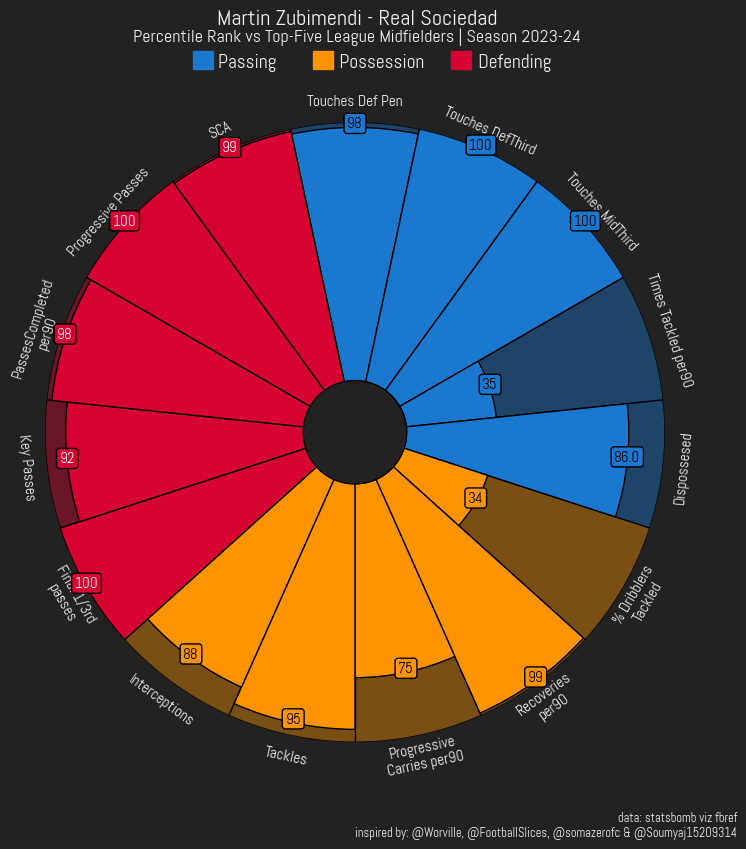

In [90]:
# parameter list
params = ["Touches Def Pen", "Touches DefThird", "Touches MidThird", "Times Tackled per90",
          "Dispossesed", "% Dribblers\nTackled", "Recoveries\nper90",
          "Progressive\nCarries per90", "Tackles", "Interceptions", "Final 1/3rd\npasses",
          "Key Passes", "PassesCompleted\nper90", "Progressive Passes", "SCA"]

# value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
values = [mfDict['touchesDefPen'], mfDict['touchesDefThird'], mfDict['touchesMidThird'], mfDict['timesTackledPer90'], mfDict['dispossesed'],mfDict['percDribTackled90'],mfDict['recoveriesPer90'],mfDict['progCarriesPer90'],mfDict['tackles'],mfDict['interceptions'],mfDict['passesFinalThird'],mfDict['keyPasses'],mfDict['PassesCompletedPer90'],mfDict['progressivePasses'],mfDict['shotCreatingActions']]

# color for the slices and text
slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# add title
fig.text(
    0.515, 0.975, "Martin Zubimendi - Real Sociedad", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.955,
    "Percentile Rank vs Top-Five League Midfielders | Season 2023-24",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#F2F2F2",
    ha="right"
)

# add text
fig.text(
    0.33, 0.925,"  Passing              Possession            Defending", size=14,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.46, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])



plt.show()

In [80]:
type(mfDict['dispossesed'])

numpy.float64

In [77]:
#Winger dict 


winger_dict{
#Attacking
'NonPenaltyGoals':
'npxG':
'xA':
'OpenPlaySCA':
'PenaltyAreaEntries':

#Possession
'TouchesAttPen': 
'ProgressivePassesRec':
'ProgressiveCarries':
'Final3rdPasses':
'Final3rdCarries':

#/90
'pAdjPressure Regains':
'pAdjTackles Made':
'pAdjInterceptions':
'Recoveries':
'Aerial Win': 
}


SyntaxError: invalid syntax (3405494281.py, line 4)

In [81]:
mfDict['recoveriesPer90']

99